In [101]:
import time
from datetime import timedelta
import matplotlib.pyplot as plt
#linear algebra
import numpy as np
#data processing
import pandas as pd
#data visualization
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

In [102]:
df = pd.read_csv("bank-additional-full -v.csv")

In [103]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9/15/2009
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,11/25/2010
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2/3/2009
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7/21/2008
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12/14/2009
5,45,services,married,basic.9y,unknown,no,no,telephone,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9/20/2008
6,59,admin.,married,professional.course,no,no,no,telephone,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,8/30/2008
7,41,blue-collar,married,unknown,unknown,no,no,telephone,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5/23/2009
8,24,technician,single,professional.course,no,yes,no,telephone,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4/3/2008
9,25,services,single,high.school,no,yes,no,telephone,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,10/4/2009


In [57]:
df.month = df.month.str.upper()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [111]:
df['year'] = pd.to_datetime(df.year)

In [112]:
df.index = df.year

In [58]:
df['month'] = pd.to_datetime(df.month, format='%b').dt.month

In [104]:
df['education'] = np.where(df['education'] == 'basic.9y', 'basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.4y', 'basic', df['education'])

In [105]:
df['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [106]:
df.drop('duration', axis = 1, inplace= True)
df.drop("pdays", axis= 1, inplace = True)
df

,age,job,marital,education,default,housing,loan,contact,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic,no,no,no,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9/15/2009
1,57,services,married,high.school,unknown,no,no,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,11/25/2010
2,37,services,married,high.school,no,yes,no,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2/3/2009
3,40,admin.,married,basic,no,no,no,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7/21/2008
4,56,services,married,high.school,no,no,yes,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12/14/2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,10/27/2010
41184,46,blue-collar,married,professional.course,no,no,no,cellular,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,5/20/2010
41185,56,retired,married,university.degree,no,yes,no,cellular,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,9/20/2010
41186,44,technician,married,professional.course,no,no,no,cellular,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,9/18/2010


In [85]:
data = df.copy()
accuracies = {}
times = {}
le = LabelEncoder()
for col in data.columns[[i == object for i in data.dtypes]]:
    data.loc[:, col] = le.fit_transform(data[col])
    print(le.classes_)

data.head(10)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic' 'high.school' 'illiterate' 'professional.course'
 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['failure' 'nonexistent' 'success']
['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
year,,,,,,,,,,,,,,,,,,
2009-09-15,56,3,1,0,0,0,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2009-09-15
2010-11-25,57,7,1,1,1,0,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2010-11-25
2009-02-03,37,7,1,1,0,2,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2009-02-03
2008-07-21,40,0,1,0,0,0,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2008-07-21
2009-12-14,56,7,1,1,0,0,2,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2009-12-14
2008-09-20,45,7,1,0,1,0,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2008-09-20
2008-08-30,59,0,1,3,0,0,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2008-08-30
2009-05-23,41,1,1,5,1,0,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2009-05-23
2008-04-03,24,9,2,3,0,2,0,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2008-04-03


In [107]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [108]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<AxesSubplot:xlabel='year'>

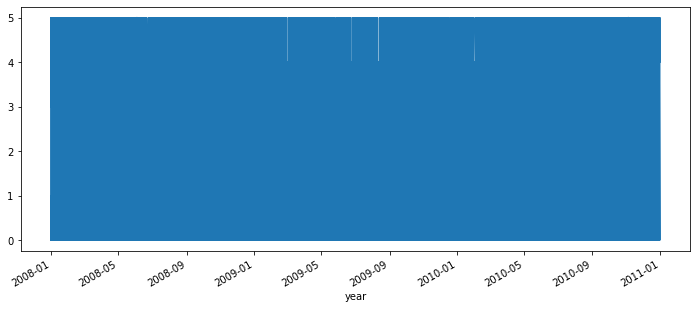

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

In [94]:
test = data[data.year < '2009-01-01']

<AxesSubplot:xlabel='year'>

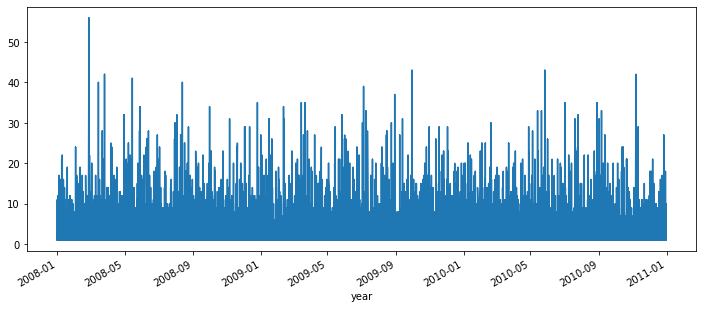

In [116]:
df['campaign'].plot(figsize = (12, 5))